In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_dir = "/content/drive/My Drive/Polygence/Audrey/"

In [0]:
% matplotlib inline
import matplotlib.pyplot as plt
import json
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

In [0]:
connotation = pd.read_csv(root_dir + 'data/annotated_connotation_frames/full_frame_info.txt', sep='\t')

In [0]:
connotation

,verb,Perspective(wo),Perspective(ws),Perspective(so),Effect(o),Effect(s),Value(o),Value(s),State(o),State(s),Perspective(ro),Perspective(rs),Perspective(os)
0,have,0.366667,0.333333,0.466667,0.066667,0.200000,0.466667,0.600000,0.066667,0.366667,0.400000,0.366667,0.066667
1,say,0.000000,0.166667,0.066667,0.133333,0.066667,0.066667,1.000000,0.000000,0.100000,0.033333,0.266667,0.000000
2,make,-0.066667,0.100000,0.100000,0.466667,-0.066667,0.200000,1.000000,0.000000,0.166667,-0.033333,0.200000,0.000000
3,take,0.500000,0.600000,0.800000,0.133333,0.600000,0.466667,0.600000,0.033333,0.666667,0.500000,0.566667,0.066667
4,go,0.066667,0.133333,0.200000,0.000000,0.066667,-0.066667,0.466667,-0.100000,0.033333,0.066667,0.066667,-0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,breed,-0.366667,-0.500000,0.000000,0.266667,-0.066667,0.066667,0.066667,-0.166667,-0.100000,-0.400000,-0.500000,0.000000
943,enrich,0.566667,0.533333,0.300000,0.866667,0.266667,1.000000,0.600000,0.433333,0.400000,0.466667,0.433333,0.533333
944,court,0.266667,0.433333,0.366667,0.400000,0.400000,0.866667,1.000000,0.333333,0.466667,0.333333,0.366667,0.300000
945,reconcile,0.400000,0.566667,0.133333,0.533333,0.333333,0.600000,0.466667,0.400000,0.033333,0.566667,0.600000,0.433333


In [0]:
with open(root_dir + "data/verbs.json") as f:
  verbs = json.load(f)

In [0]:
with open(root_dir + "data/adjectives.json") as f:
  adjectives = json.load(f)

In [0]:
names = ["Warren", "Biden", "Sanders", "Buttigieg", "Harris", "Yang"]

In [0]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
  
# a denotes adjective in "pos" 
print("better :", lemmatizer.lemmatize("better", pos ="a")) 


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
better : good


In [0]:
a = []
for n in names:
  for word, count in verbs[n].items():
    lemma = lemmatizer.lemmatize(word, pos="v")
    lookup = connotation[connotation["verb"] == lemma]
    if len(lookup) == 0:
      continue
    s = float(lookup["Perspective(ws)"])
    effect = float(lookup["Effect(o)"])
    for i in range(count):
      a.append({"verb": lemma, "candidate":n, "sentiment": s, "effect": effect})

In [0]:
data = pd.DataFrame(a)
data

,verb,candidate,sentiment,effect
0,want,Warren,0.166667,0.066667
1,want,Warren,0.166667,0.066667
2,want,Warren,0.166667,0.066667
3,want,Warren,0.166667,0.066667
4,want,Warren,0.166667,0.066667
...,...,...,...,...
46420,select,Yang,0.233333,0.466667
46421,select,Yang,0.233333,0.466667
46422,post,Yang,0.300000,0.466667
46423,share,Yang,0.466667,0.133333


(0.2, 0.3)

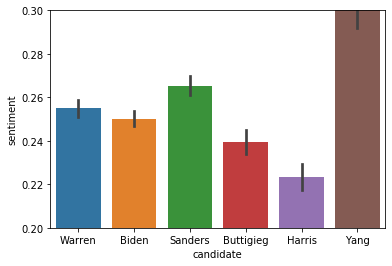

In [0]:
sns.barplot(data=data, x="candidate", y="sentiment") #valence
plt.ylim(.2, .3)

plt.xlim("Warren", "Biden", "Sanders")

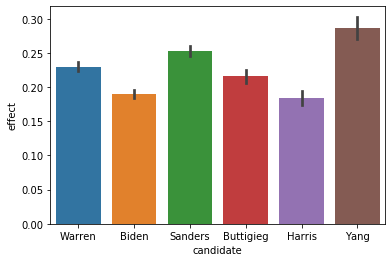

In [0]:
sns.barplot(data=data, x="candidate", y="effect")

# look at different sources, adjectives with emotions and dominance

In [0]:
poweragency = pd.read_csv(root_dir + 'data/agency_power.csv', sep=',')

In [0]:
poweragency

,verb,agency,power
0,abandons,agency_pos,power_agent
1,abolishes,agency_pos,power_agent
2,absorbs,agency_pos,power_agent
3,abuses,agency_pos,power_agent
4,accelerates,agency_pos,power_agent
...,...,...,...
2150,yelps,agency_pos,NaN
2151,yields,agency_equal,power_agent
2152,zaps,agency_pos,power_agent
2153,zips,agency_pos,NaN


In [0]:
replace_agency = {
    "agency_pos": 1,
    "agency_neg": -1,
    "agency_equal": 0
}

replace_power = {
    "power_agent": 1,
    "power_theme": -1,
    "power_equal": 0
}

In [0]:
poweragency["agency"] = poweragency["agency"].map(replace_agency)
poweragency["power"] = poweragency["power"].map(replace_power)
poweragency

,verb,agency,power
0,abandons,1.0,1.0
1,abolishes,1.0,1.0
2,absorbs,1.0,1.0
3,abuses,1.0,1.0
4,accelerates,1.0,1.0
...,...,...,...
2150,yelps,1.0,NaN
2151,yields,0.0,1.0
2152,zaps,1.0,1.0
2153,zips,1.0,NaN


In [0]:
poweragency["lemma"] = poweragency["verb"].apply(lambda x: lemmatizer.lemmatize(x, pos="v"))

In [0]:
poweragency

,verb,agency,power,lemma
0,abandons,1.0,1.0,abandon
1,abolishes,1.0,1.0,abolish
2,absorbs,1.0,1.0,absorb
3,abuses,1.0,1.0,abuse
4,accelerates,1.0,1.0,accelerate
...,...,...,...,...
2150,yelps,1.0,NaN,yelp
2151,yields,0.0,1.0,yield
2152,zaps,1.0,1.0,zap
2153,zips,1.0,NaN,zip


In [0]:
a = []
for n in names:
  for word, count in verbs[n].items():
    lemma = lemmatizer.lemmatize(word, pos="v")
    lookup = poweragency[poweragency["lemma"] == lemma]
    if len(lookup) == 0:
      continue
    agency = float(lookup["agency"].iloc[0])
    if agency != agency:
      agency = 0
    power = float(lookup["power"].iloc[0])
    if power != power:
      power = 0
    for i in range(count):
      a.append({"verb": lemma, "candidate":n, "agency": agency, "power": power})

In [0]:
data = pd.DataFrame(a)
data

,verb,candidate,agency,power
0,want,Warren,-1.0,-1.0
1,want,Warren,-1.0,-1.0
2,want,Warren,-1.0,-1.0
3,want,Warren,-1.0,-1.0
4,want,Warren,-1.0,-1.0
...,...,...,...,...
50996,select,Yang,1.0,1.0
50997,select,Yang,1.0,1.0
50998,post,Yang,1.0,1.0
50999,share,Yang,1.0,1.0


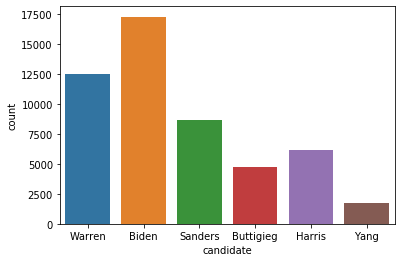

In [0]:
sns.countplot(x="candidate", data=data)

(0.6, 0.75)

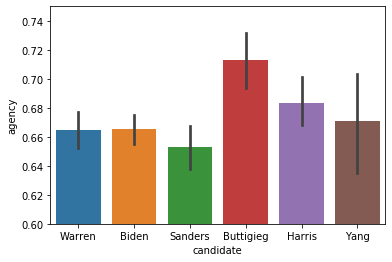

In [0]:
sns.barplot(data=data, x="candidate", y="agency")
plt.ylim(0.6, 0.75)

(0.2, 0.4)

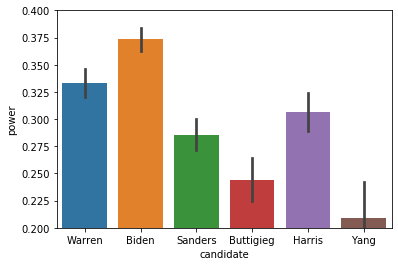

In [0]:
sns.barplot(data=data, x="candidate", y="power")
plt.ylim(0.2, 0.4)

In [0]:
vad = pd.read_csv(root_dir + 'data/NRC-VAD-Lexicon.txt', sep='\t')
vad

,Word,Valence,Arousal,Dominance
0,aaaaaaah,0.479,0.606,0.291
1,aaaah,0.520,0.636,0.282
2,aardvark,0.427,0.490,0.437
3,aback,0.385,0.407,0.288
4,abacus,0.510,0.276,0.485
...,...,...,...,...
20002,zoo,0.760,0.520,0.580
20003,zoological,0.667,0.458,0.492
20004,zoology,0.568,0.347,0.509
20005,zoom,0.490,0.520,0.462


In [0]:
a = []
for n in names:
  for word, count in verbs[n].items():
    lemma = lemmatizer.lemmatize(word, pos="v")
    lookup = vad[vad["Word"] == lemma]
    if len(lookup) == 0:
      continue
    valence = float(lookup["Valence"].iloc[0])
    arousal = float(lookup["Arousal"].iloc[0])
    dominance = float(lookup["Dominance"].iloc[0])
    for i in range(count):
      a.append({"word": lemma, "candidate":n, "valence": valence, "arousal": arousal, "dominance": dominance})
  for word, count in adjectives[n].items():
    lookup = vad[vad["Word"] == word]
    if len(lookup) == 0:
      continue
    valence = float(lookup["Valence"].iloc[0])
    arousal = float(lookup["Arousal"].iloc[0])
    dominance = float(lookup["Dominance"].iloc[0])
    for i in range(count):
      a.append({"word": word, "candidate":n, "valence": valence, "arousal": arousal, "dominance": dominance})

In [0]:
vad_data = pd.DataFrame(a)
vad_data

,word,candidate,valence,arousal,dominance
0,be,Warren,0.670,0.240,0.554
1,be,Warren,0.670,0.240,0.554
2,be,Warren,0.670,0.240,0.554
3,be,Warren,0.670,0.240,0.554
4,be,Warren,0.670,0.240,0.554
...,...,...,...,...,...
59820,democratic,Yang,0.802,0.519,0.798
59821,recent,Yang,0.592,0.365,0.589
59822,bad,Yang,0.125,0.625,0.373
59823,fed,Yang,0.602,0.370,0.482


(0.55, 0.65)

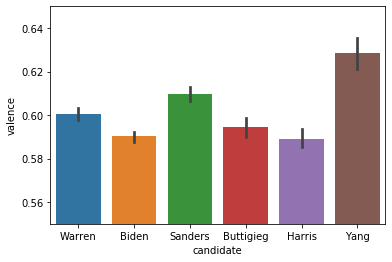

In [0]:
sns.barplot(data=vad_data, x="candidate", y="valence")
plt.ylim(0.55, 0.65)

(0.4, 0.5)

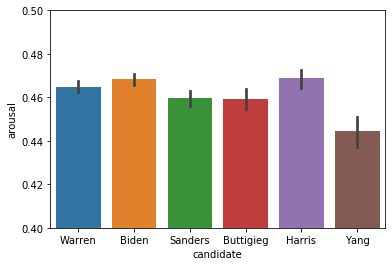

In [0]:
sns.barplot(data=vad_data, x="candidate", y="arousal")
plt.ylim(0.4, 0.5)

(0.5, 0.6)

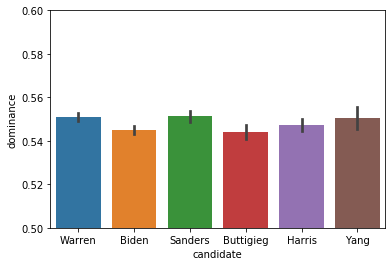

In [0]:
sns.barplot(data=vad_data, x="candidate", y="dominance")
plt.ylim(0.5, 0.6)

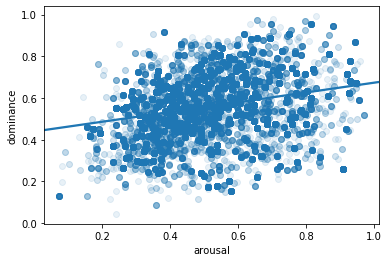

In [0]:
sns.regplot(x="arousal", y="dominance", data=vad_data, scatter_kws={'alpha':0.1})

In [0]:
from scipy.stats import pearsonr

In [0]:
pearsonr(vad_data["arousal"], vad_data["dominance"])

(0.30957494816283915, 0.0)

In [0]:
pearsonr(vad_data["valence"], vad_data["dominance"])

(0.4664939852963269, 0.0)

In [0]:
pearsonr(vad_data["valence"], vad_data["arousal"])

(-0.2547178582550087, 0.0)